# Performance metrics

In [2]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Accuracy

## Precision

## Recall

## F1 Score

The F1 score is the harmonic mean, where the harmonic mean $\bar{x}_H$ of $n$ real numbers, $x_1,x_2,...,x_n$ is given by

$$
\bar{x}_H = \frac{n}{x_1^{-1} + x_2^{-1} + \cdots + x_n^{-1}},
$$

 of precision and recall and is given by

$$
F_1 = 2\left( \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} \right)= \frac{2\times\text{TP}}{2\times \text{TP} + \text{FP} + \text{FN}}
$$

## Area under curve (AUC)

The area under the curve, where the curve refers to the receiver operating characteristic (ROC) curve, is a popular performance metric for, usually binary also multiclass, classification models. The ROC curves plots the true positive rate versus the false positive rate at all possible values of the model's probability threshold for prediction. For example for a logistic regression model if the model's threshold is $0.7$ then the model will predict an input belongs to the default of the two possible classes if the output probablity from the model exceeds $0.7$ i.e. if $P(Y=\text{default}|X=x) > 0.7$ for an input, $x$, to the model.

The area under this curve (AUC) gives a summary of the model's performance at all possible threshold values and ranges from $[0,1]$ with $1$ indicating a perfect classifier on the test set. The AUC of a model that simply assigns labels uniformly at random would be $0.5$ and the ROC curve would simply be a straight line. Naturally a model with an ROC curve which hugs the top left corner of the plot is better. 

AUC score: 0.9856


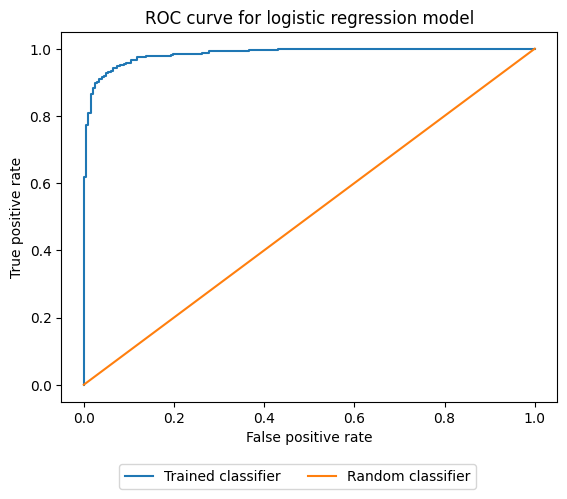

In [11]:
data = load_breast_cancer()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


class_scores = model.predict_proba(X_test)  # get class probabilities from model
positive_label_scores = class_scores[:, 1]  # get probabilities for class 1

fpr, tpr, thresholds = roc_curve(y_test, positive_label_scores, pos_label=1)
auc_score = roc_auc_score(y_test, positive_label_scores)
print(f"AUC score: {auc_score:.4}")


plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for logistic regression model")
plt.plot(fpr, tpr, label="Trained classifier")
plt.plot(np.linspace(0.0,1.0), np.linspace(0.0,1.0), label="Random classifier")
plt.legend(fancybox=True, ncols=2, bbox_to_anchor=(.85, -0.15));

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv

Last updated: Sat Apr 12 2025

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.2

matplotlib: 3.7.4
numpy     : 1.26.2

